# Walkthroughs and Exercises for \*Fundamentals of Statistics with

Python\*

Dr. Chester Ismay

In [ ]:
# Install the packages directly if needed with pip
# Check the repo's README below for more information
!pip install numpy pandas scipy matplotlib seaborn statsmodels scikit-learn jupyter

In [ ]:
import pandas as pd

# Display all columns
pd.set_option('display.max_columns', None)

# Display all outputs from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Week 1

## Walkthrough 1.1: Getting Started

### Setting Up the Python Environment

If you haven’t already installed Python, Jupyter, and the necessary
packages, there are instructions on the course repo in the README to do
so
[here](https://github.com/ismayc/oreilly-fundamentals-of-statistics-with-python/blob/main/README.md).

If you aren’t able to do this on your machine, you may want to check out
[Google Colab](https://colab.research.google.com/). It’s a free service
that allows you to run Jupyter notebooks in the cloud. Alternatively,
I’ve set up some temporary notebooks on Binder
([![()](https://mybinder.org/badge_logo.svg)](%5B!%5BBinder%5D(https://mybinder.org/badge_logo.svg)%5D(https://mybinder.org/v2/gh/ismayc/oreilly-fundamentals-of-statistics-with-python/main?urlpath=%2Fdoc%2Ftree%2Fexercises.ipynb))
that you can work with online as well.

In [ ]:
# Importing libraries/modules and aliasing them as needed
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Exploring a dataset

In [ ]:
# Load in the dataset
data_dev_survey = pd.read_csv("data_dev_survey.csv")

In [ ]:
# Display information about the DataFrame
data_dev_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   response_id                 1183 non-null   int64  
 1   work_as_dev                 1183 non-null   object 
 2   age                         1183 non-null   object 
 3   employment                  1183 non-null   object 
 4   remote_work                 1183 non-null   object 
 5   coding_activities           1182 non-null   object 
 6   ed_level                    1183 non-null   object 
 7   dev_type                    1183 non-null   object 
 8   years_code                  1182 non-null   float64
 9   years_code_pro              1183 non-null   int64  
 10  org_size                    1183 non-null   object 
 11  country                     1183 non-null   object 
 12  language_have_worked_with   1183 non-null   object 
 13  language_want_to_work_with  1116 

### Performing basic statistical functions using NumPy, Pandas, and SciPy.

#### Using NumPy

In [ ]:
# Calculate the mean of the years_code_pro column
np.mean(data_dev_survey['years_code_pro'])

np.float64(7.961115807269653)

In [ ]:
# Calculate the median of the work_exp column
np.median(data_dev_survey['work_exp'])

np.float64(7.0)

In [ ]:
# Calculate the standard deviation of the converted_comp_yearly column
np.std(data_dev_survey['converted_comp_yearly'])

np.float64(81861.24268446874)

#### Using Pandas

In [ ]:
# Display summary statistics on the numeric columns of the DataFrame
data_dev_survey.describe()

        response_id   years_code  years_code_pro     work_exp  \
count   1183.000000  1182.000000     1183.000000  1183.000000   
mean   43949.774303    12.534687        7.961116     9.650042   
std    25327.979423     8.384094        7.153751     8.189750   
min      164.000000     1.000000        0.000000     0.000000   
25%    22733.000000     7.000000        3.000000     4.000000   
50%    43305.000000    10.000000        6.000000     7.000000   
75%    65791.000000    16.000000       10.000000    13.000000   
max    89072.000000    50.000000       50.000000    48.000000   

       converted_comp_yearly  
count           1.183000e+03  
mean            9.068442e+04  
std             8.189586e+04  
min             3.000000e+00  
25%             4.159300e+04  
50%             7.271400e+04  
75%             1.200000e+05  
max             1.200000e+06  

#### Using SciPy

In [ ]:
# Separate the data into two groups
using_ai = data_dev_survey[data_dev_survey['plans_to_use_ai'] == 'Using']\
            ['converted_comp_yearly']
plan_to_use_ai = data_dev_survey[data_dev_survey['plans_to_use_ai'] == 'Plan to use']\
            ['converted_comp_yearly']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(using_ai, plan_to_use_ai, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")

T-statistic: 0.9293366153676751

P-value: 0.3529304815725288

## Exercise 1.1: Getting Started

### Setting Up the Python Environment

If you ran the `# Importing libraries and aliasing them` code above, you
should be good to proceed here. If not, scroll up and run it.

### Exploring a dataset

In [ ]:
# Load in the coffee_quality dataset
coffee_quality = pd.read_csv("coffee_quality.csv")

In [ ]:
# Display information about the DataFrame
coffee_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_of_origin    207 non-null    object 
 1   continent_of_origin  207 non-null    object 
 2   farm_name            205 non-null    object 
 3   lot_number           206 non-null    object 
 4   mill                 204 non-null    object 
 5   company              207 non-null    object 
 6   altitude             206 non-null    object 
 7   region               205 non-null    object 
 8   producer             206 non-null    object 
 9   in_country_partner   207 non-null    object 
 10  harvest_year         207 non-null    object 
 11  grading_date         207 non-null    object 
 12  owner                207 non-null    object 
 13  variety              201 non-null    object 
 14  processing_method    202 non-null    object 
 15  aroma                207 non-null    flo

### Performing basic statistical functions using NumPy, Pandas, and SciPy.

#### Using NumPy

In [ ]:
# Calculate the mean of the aroma column
np.mean(coffee_quality['aroma'])

np.float64(7.721062801932368)

In [ ]:
# Calculate the median of the total_cup_points column
np.median(coffee_quality['total_cup_points'])

np.float64(83.75)

In [ ]:
# Calculate the standard deviation of the moisture_percentage column
np.std(coffee_quality['moisture_percentage'])

np.float64(1.2444515707780472)

#### Using Pandas

In [ ]:
# Display summary statistics on the numeric columns of the DataFrame
coffee_quality.describe()

            aroma      flavor  aftertaste    acidity        body     balance  \
count  207.000000  207.000000  207.000000  207.00000  207.000000  207.000000   
mean     7.721063    7.744734    7.599758    7.69029    7.640918    7.644058   
std      0.287626    0.279613    0.275911    0.25951    0.233499    0.256299   
min      6.500000    6.750000    6.670000    6.83000    6.830000    6.670000   
25%      7.580000    7.580000    7.420000    7.50000    7.500000    7.500000   
50%      7.670000    7.750000    7.580000    7.67000    7.670000    7.670000   
75%      7.920000    7.920000    7.750000    7.87500    7.750000    7.790000   
max      8.580000    8.500000    8.420000    8.58000    8.250000    8.420000   

       uniformity  clean_cup  sweetness     overall  total_cup_points  \
count  207.000000      207.0      207.0  207.000000        207.000000   
mean     9.990338       10.0       10.0    7.676812         83.706570   
std      0.103306        0.0        0.0    0.306359         

#### Using SciPy

In [ ]:
# Focus on only Asia and North America entries

# Separate the data into two groups
asian = coffee_quality\
            [coffee_quality['continent_of_origin'] == 'Asia']\
            ['total_cup_points']
north_american = coffee_quality\
            [coffee_quality['continent_of_origin'] == 'North America']\
            ['total_cup_points']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(asian, north_american, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")

T-statistic: 2.5481369690475355

P-value: 0.011898171131418231

------------------------------------------------------------------------

## Walkthrough 1.2: Data Summarizing

### Compute and interpret measures of central tendency

In [ ]:
# Calculate center statistics for years_code_pro
data_dev_survey['years_code_pro'].mean()

np.float64(7.961115807269653)

np.float64(6.0)

0    2
Name: years_code_pro, dtype: int64

np.int64(2)

### Compute and interpret measures of variation

In [ ]:
# Calculate spread statistics for years_code_pro
range_years_code_pro = data_dev_survey['years_code_pro'].max() \
                        - data_dev_survey['years_code_pro'].min()
range_years_code_pro

np.int64(50)

np.float64(51.17615171500372)

np.float64(7.153750884326607)

In [ ]:
# Calculate the five-number summary for 'years_code_pro'
min_years_code_pro = data_dev_survey['years_code_pro'].min()
q1_years_code_pro = data_dev_survey['years_code_pro'].quantile(0.25)
median_years_code_pro = data_dev_survey['years_code_pro'].median()
q3_years_code_pro = data_dev_survey['years_code_pro'].quantile(0.75)
max_years_code_pro = data_dev_survey['years_code_pro'].max()

# Print them out
print(f"Five-Number Summary for years_code_pro:")

Five-Number Summary for years_code_pro:

Minimum: 0

First Quartile (Q1): 3.0

Median (Q2): 6.0

Third Quartile (Q3): 10.0

Maximum: 50

## Exercise 1.2: Data Summarizing

In [ ]:
# Calculate center statistics for 'aroma'
mean_aroma = coffee_quality['aroma'].mean()
median_aroma = coffee_quality['aroma'].median()
mode_aroma = coffee_quality['aroma'].mode()[0]

print(f"Mean of aroma: {mean_aroma}")

Mean of aroma: 7.721062801932368

Median of aroma: 7.67

Mode of aroma: 7.67

In [ ]:
# Calculate spread statistics for 'aroma'
range_aroma = coffee_quality['aroma'].max() - coffee_quality['aroma'].min()
variance_aroma = coffee_quality['aroma'].var(ddof=1)  # Sample variance
std_dev_aroma = coffee_quality['aroma'].std(ddof=1)  # Sample standard deviation

print(f"Range of aroma: {range_aroma}")

Range of aroma: 2.08

Variance of aroma: 0.08272896205618872

Standard Deviation of aroma: 0.2876264279515857

In [ ]:
# Calculate the five-number summary for 'aroma'
min_aroma = coffee_quality['aroma'].min()
q1_aroma = coffee_quality['aroma'].quantile(0.25)
median_aroma = coffee_quality['aroma'].median()
q3_aroma = coffee_quality['aroma'].quantile(0.75)
max_aroma = coffee_quality['aroma'].max()

print(f"Five-Number Summary for aroma:")

Five-Number Summary for aroma:

Minimum: 6.5

First Quartile (Q1): 7.58

Median (Q2): 7.67

Third Quartile (Q3): 7.92

Maximum: 8.58

------------------------------------------------------------------------

## Walkthrough 1.3: Cleaning and Preparing Data with Pandas

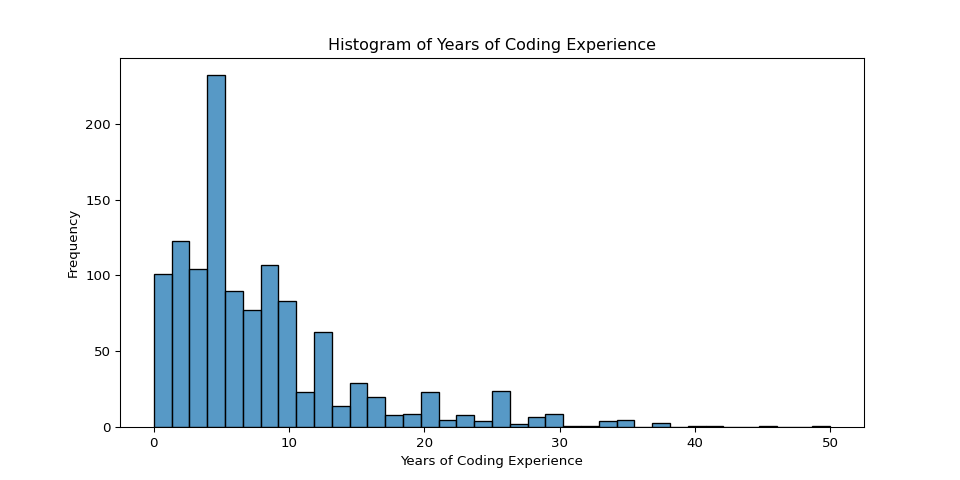

In [ ]:
# Histogram for years_code_pro
sns.histplot(data_dev_survey['years_code_pro']);
plt.title('Histogram of Years of Coding Experience');
plt.xlabel('Years of Coding Experience');
plt.ylabel('Frequency');
plt.show()

In [ ]:
# Set the default figure size for all plots (unless specified)
plt.rcParams['figure.figsize'] = (10, 5)

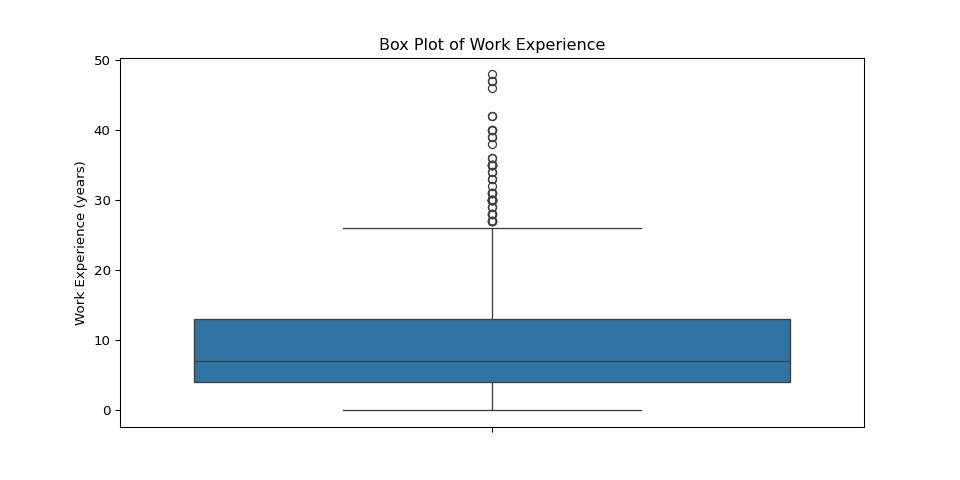

In [ ]:
# Box plot for work_exp
sns.boxplot(y=data_dev_survey['work_exp']);
plt.title('Box Plot of Work Experience');
plt.ylabel('Work Experience (years)');
plt.show()

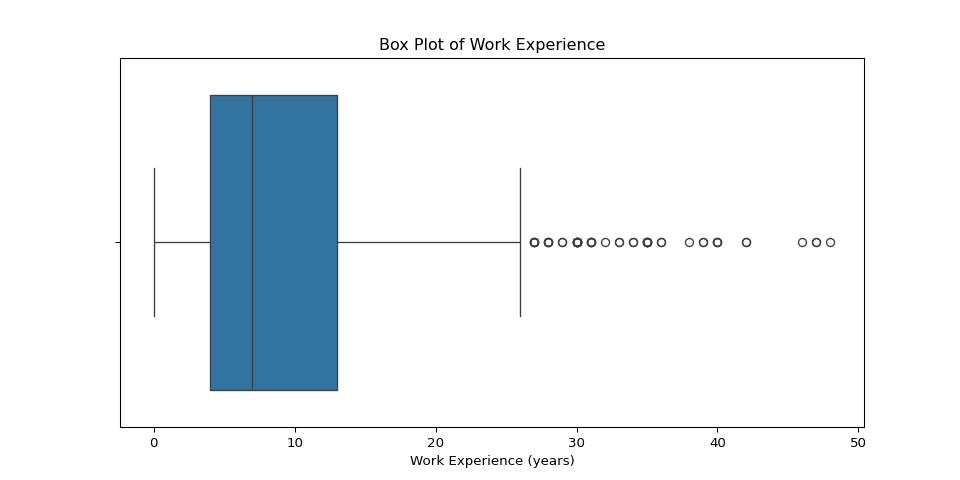

In [ ]:
# Can also make it horizontal in orientation
sns.boxplot(x=data_dev_survey['work_exp']);
plt.title('Box Plot of Work Experience');
plt.xlabel('Work Experience (years)');
plt.show()

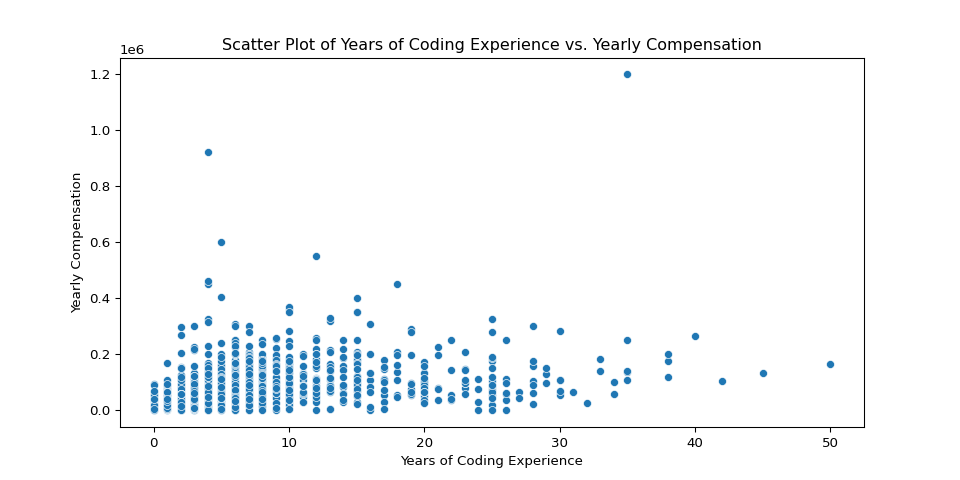

In [ ]:
# Scatter plot for years_code_pro vs. converted_comp_yearly
sns.scatterplot(x=data_dev_survey['years_code_pro'], 
                y=data_dev_survey['converted_comp_yearly']);
plt.title('Scatter Plot of Years of Coding Experience vs. Yearly Compensation');
plt.xlabel('Years of Coding Experience');
plt.ylabel('Yearly Compensation');
plt.show()

## Exercise 1.3: Cleaning and Preparing Data with Pandas

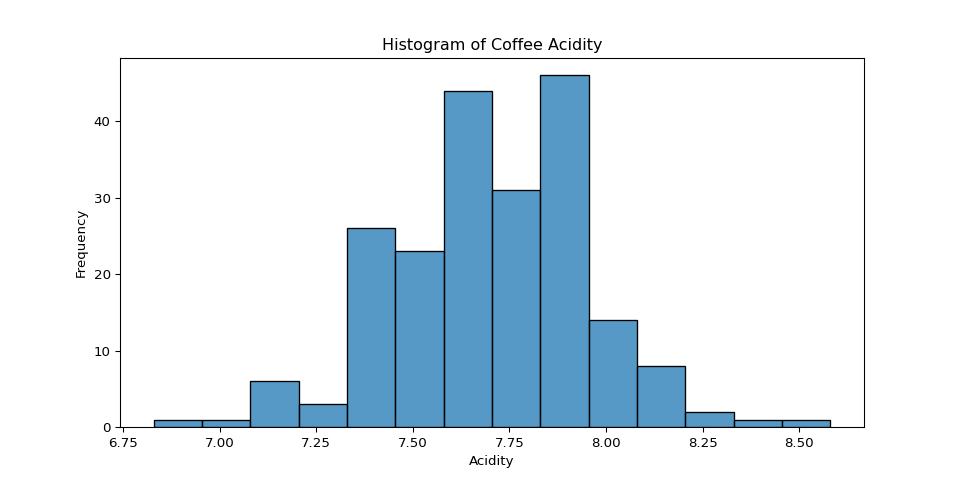

In [ ]:
# Histogram for acidity
sns.histplot(coffee_quality['acidity']);
plt.title('Histogram of Coffee Acidity');
plt.xlabel('Acidity');
plt.ylabel('Frequency');
plt.show()

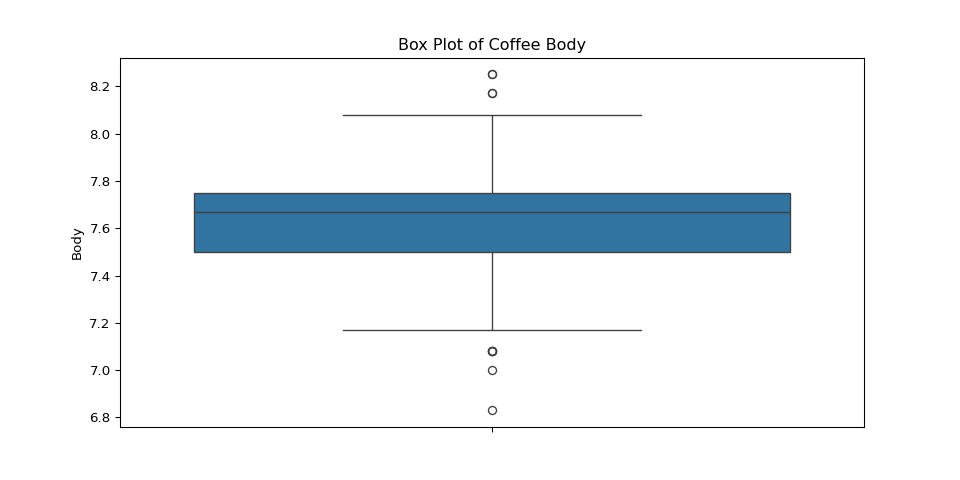

In [ ]:
# Box plot for body
sns.boxplot(y=coffee_quality['body']);
plt.title('Box Plot of Coffee Body');
plt.ylabel('Body');
plt.show()

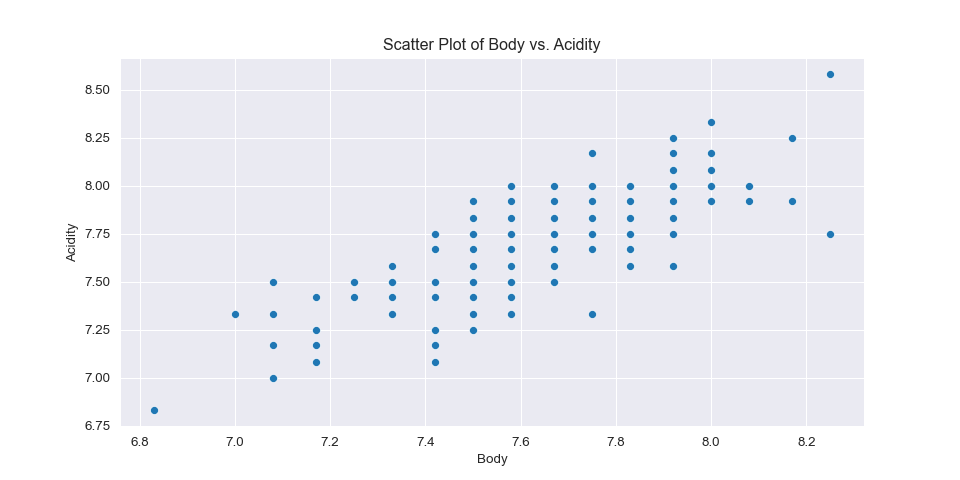

In [ ]:
# Set the Seaborn style to 'darkgrid'
# This sets the color of the points to dark with a light grid background
sns.set_style("darkgrid")

# Scatter plot for body vs. acidity
sns.scatterplot(x=coffee_quality['body'], y=coffee_quality['acidity']);
plt.title('Scatter Plot of Body vs. Acidity');
plt.xlabel('Body');
plt.ylabel('Acidity');
plt.show()

------------------------------------------------------------------------

## Walkthrough 1.4: Sampling Distribution Generation

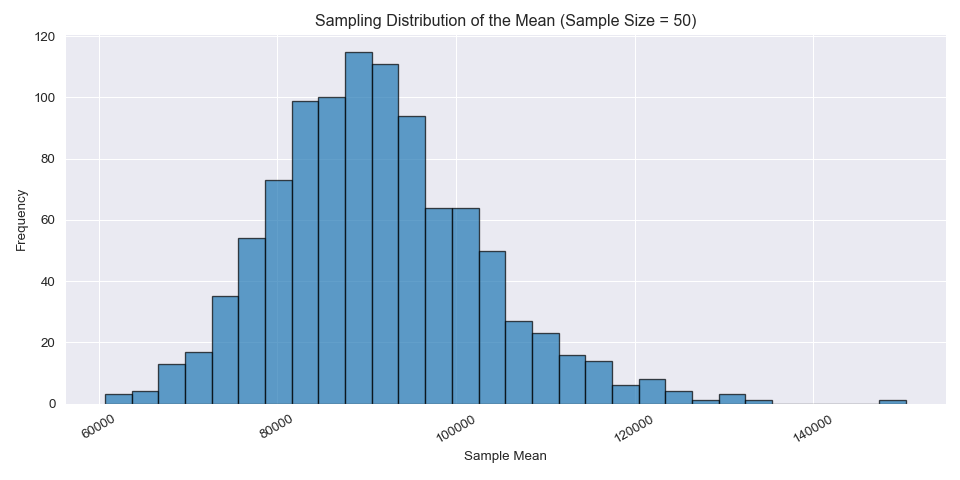

In [ ]:
# Think of our data as a population to draw from
population = data_dev_survey['converted_comp_yearly'].dropna().values

# Generate a large sample from the 'converted_comp_yearly' column
# Parameters
sample_size = 50
num_samples = 1000

# Set a seed to make code reproducible
np.random.seed(2024)

# Simulate sampling distribution of the mean
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, sample_size)
    sample_means.append(np.mean(sample))

# Plot the sampling distribution of the sample means
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7);
plt.title('Sampling Distribution of the Mean (Sample Size = 50)');
plt.xlabel('Sample Mean');
plt.ylabel('Frequency');
plt.xticks(rotation=30);
# Adjust layout so labels are not cut off
plt.tight_layout();
plt.show()

## Exercise 1.4: Sampling Distribution Generation

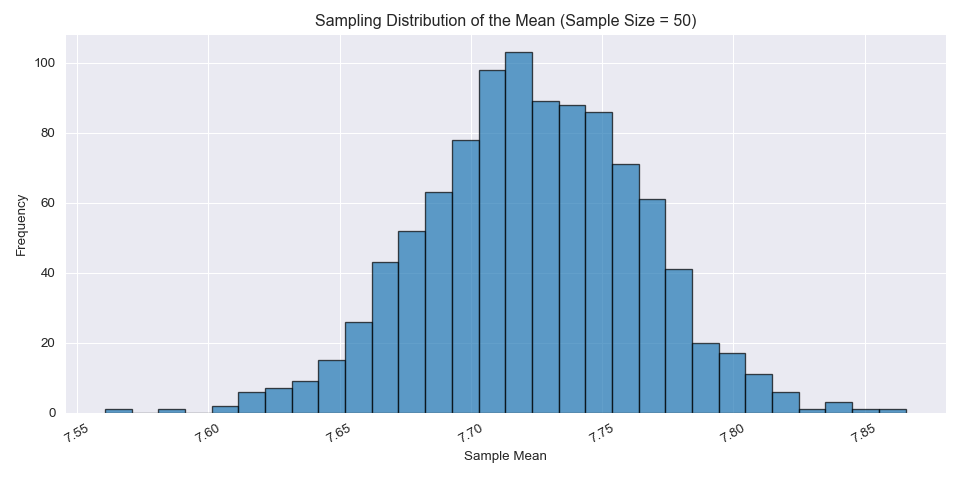

In [ ]:
# Think of our aroma data as a population to draw from
population = coffee_quality['aroma'].dropna().values

# Parameters
sample_size = 50
num_samples = 1000

# Set random seed
np.random.seed(2024)

# Simulate sampling distribution of the mean
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, sample_size)
    sample_means.append(np.mean(sample))

# Plot the sampling distribution of the sample means
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7);
plt.title('Sampling Distribution of the Mean (Sample Size = 50)');
plt.xlabel('Sample Mean');
plt.ylabel('Frequency');
plt.xticks(rotation=30);
# Adjust layout so labels are not cut off
plt.tight_layout();
plt.show()

------------------------------------------------------------------------

# Week 2

## Walkthrough 2.1: Advanced Plots

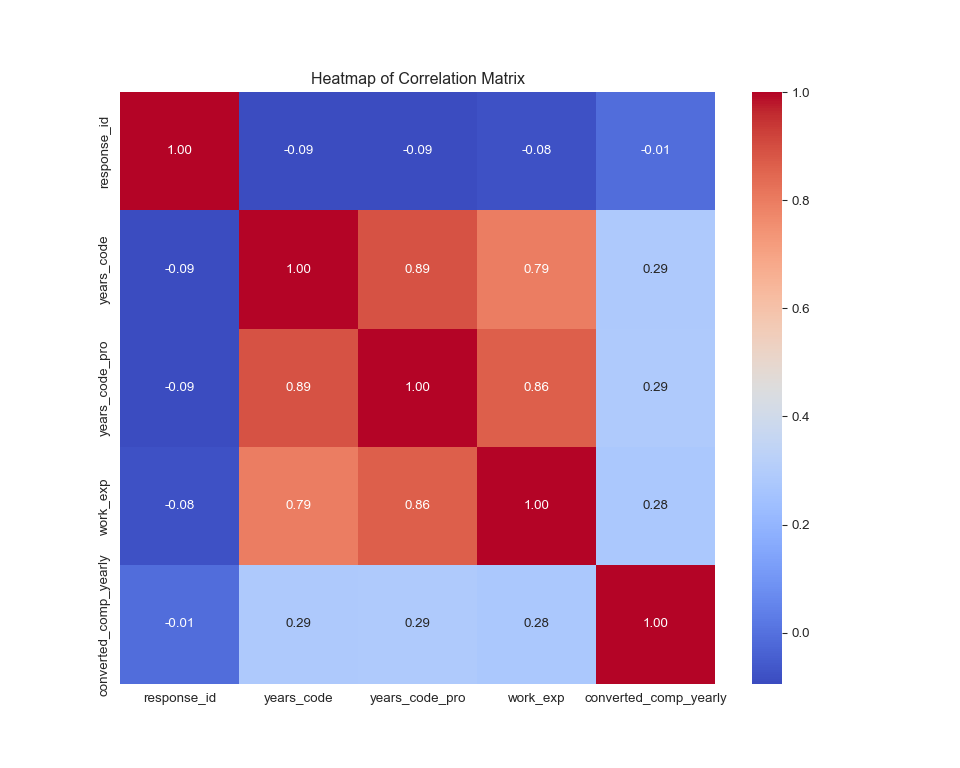

In [ ]:
# Select only numeric columns
numeric_columns = data_dev_survey.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8));
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f'); 
plt.title('Heatmap of Correlation Matrix');
plt.show()

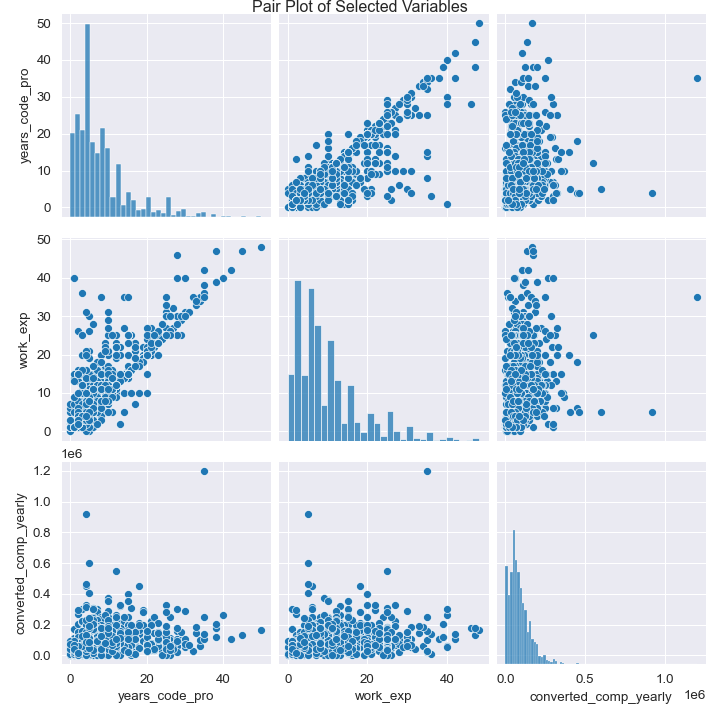

In [ ]:
# Pair plot for selected variables 'years_code_pro', 'work_exp', 'converted_comp_yearly'
sns.pairplot(data_dev_survey, 
             vars=['years_code_pro', 'work_exp', 'converted_comp_yearly']);
plt.suptitle('Pair Plot of Selected Variables', y=1);
plt.show()

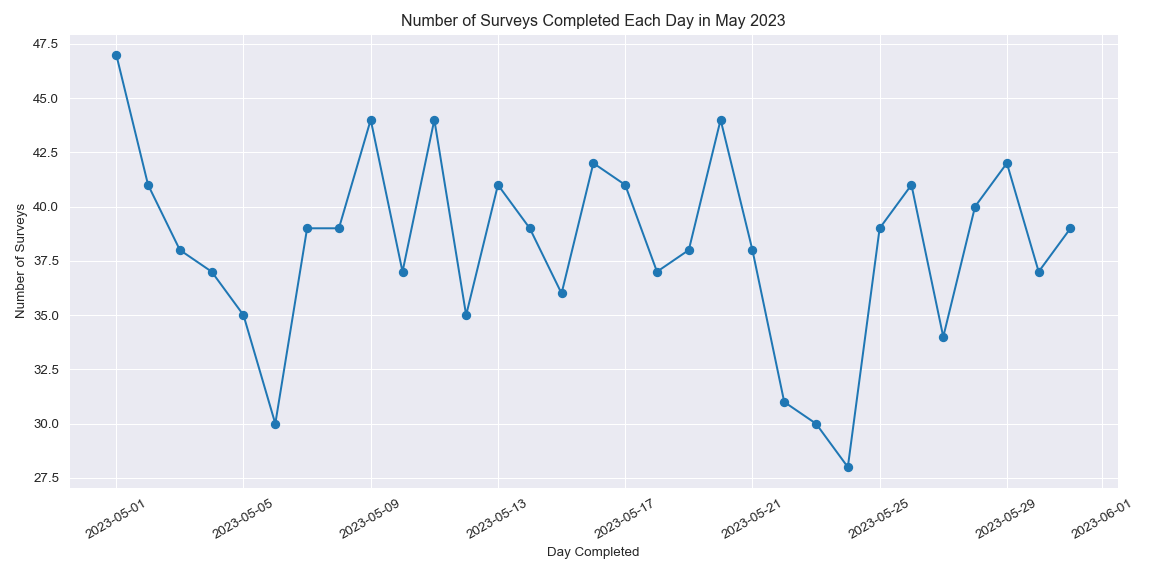

In [ ]:
# Time series plot
data_dev_survey['survey_completion_date'] = \
  pd.to_datetime(data_dev_survey['survey_completion_date'])

# Count the number of surveys completed each day
daily_counts = data_dev_survey['survey_completion_date'].value_counts().sort_index()

# Plot the counts as a line chart
plt.figure(figsize=(12, 6));
plt.plot(daily_counts.index, daily_counts.values, marker='o');
plt.title('Number of Surveys Completed Each Day in May 2023');
plt.xlabel('Day Completed');
plt.ylabel('Number of Surveys');
plt.xticks(rotation=30);
plt.grid(True);
plt.tight_layout();
plt.show()

## Exercise 2.1: Advanced Plots

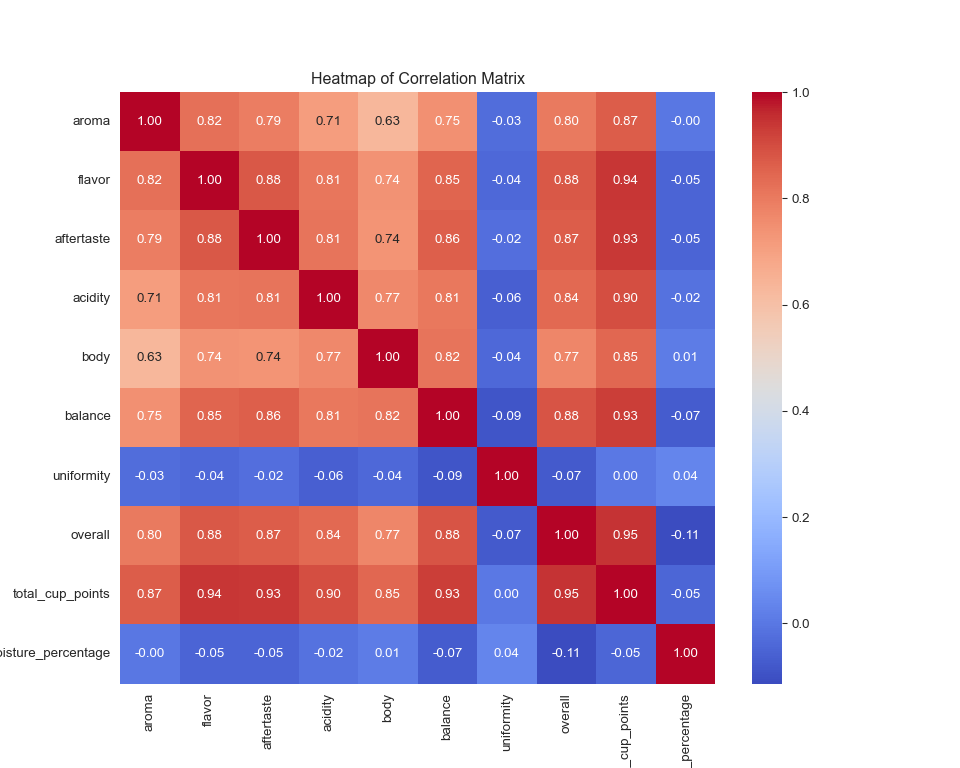

In [ ]:
# Select only numeric columns
numeric_columns = coffee_quality.select_dtypes(include=[np.number])

# Drop the 'clean_cup' and 'sweetness' columns since they are always 10
numeric_columns = numeric_columns.drop(columns=['clean_cup', 'sweetness'], 
                                       errors='ignore')

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8));
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f');
plt.title('Heatmap of Correlation Matrix');
plt.show()

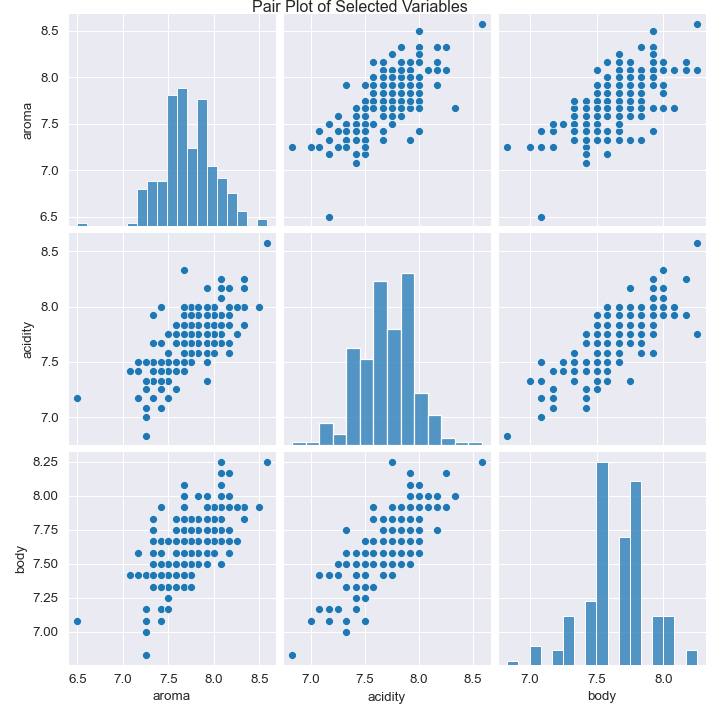

In [ ]:
# Pair plot for selected variables ['aroma', 'acidity', 'body']
sns.pairplot(coffee_quality, vars=['aroma', 'acidity', 'body']);
plt.suptitle('Pair Plot of Selected Variables', y=1);
plt.show()

-   **Datetime Accessor `.dt`:**
    -   The `.dt` accessor is used with pandas Series that contain
        datetime objects.
    -   It provides access to datetime-specific attributes and methods.
-   **Convert to a Period with Monthly Frequency:**
    -   The method `.to_period('M')` converts each datetime value into a
        **Period** object with a monthly frequency.
    -   The argument `'M'` stands for “month”. This means that each date
        is represented as a period corresponding to its month and year.
    -   For example, if `grading_date` is `2023-03-15`, converting it
        with `.to_period('M')` will result in a period like `2023-03`.

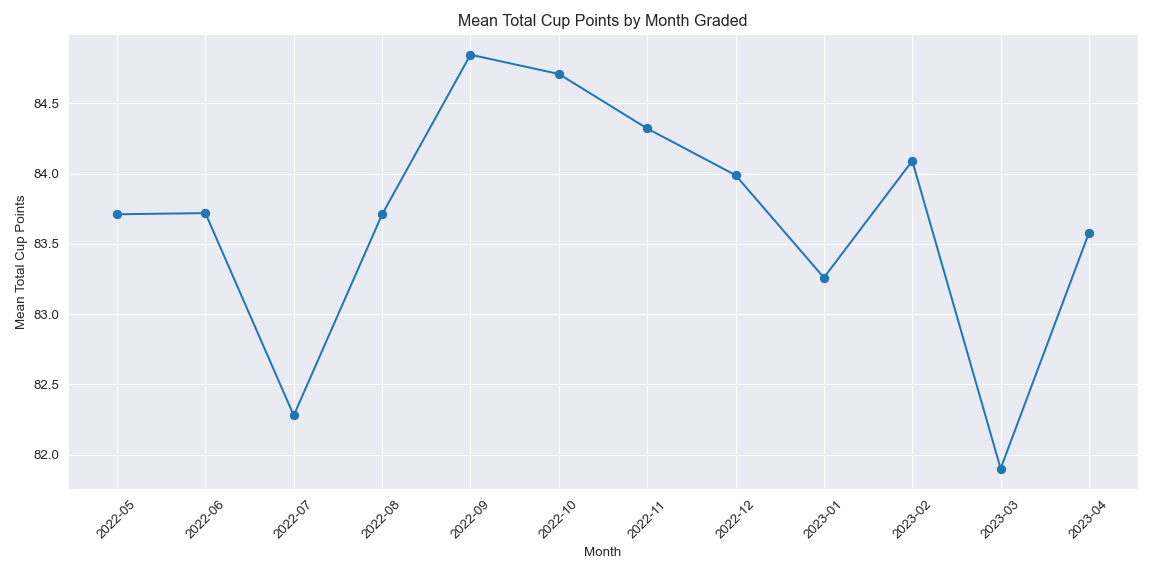

In [ ]:
# Plot the mean total_cup_points for each grading_date

# Convert to datetime
coffee_quality['grading_date'] = pd.to_datetime(coffee_quality['grading_date'])

# Extract the month and year from the grading_date column
coffee_quality['month'] = coffee_quality['grading_date'].dt.to_period('M')

# Aggregate the mean total_cup_points by month
monthly_mean = coffee_quality.groupby('month')['total_cup_points'].mean()

# Plot the mean total_cup_points by month as a line chart
plt.figure(figsize=(12, 6));
plt.plot(monthly_mean.index.astype(str), monthly_mean.values, marker='o');
plt.title('Mean Total Cup Points by Month Graded');
plt.xlabel('Month');
plt.ylabel('Mean Total Cup Points');
plt.xticks(rotation=45);
plt.grid(True);
plt.tight_layout();
plt.show()

------------------------------------------------------------------------

## Walkthrough 2.2: EDA

### Data Cleaning

In [ ]:
# Check for missing values
data_dev_survey.isnull().sum()

response_id                     0
work_as_dev                     0
age                             0
employment                      0
remote_work                     0
coding_activities               1
ed_level                        0
dev_type                        0
years_code                      1
years_code_pro                  0
org_size                        0
country                         0
language_have_worked_with       0
language_want_to_work_with     67
op_sys_professional_use        73
ai_view                         0
ai_trust                        0
ic_or_manager                   0
work_exp                        0
industry                      234
us_or_not                       0
plans_to_use_ai                 0
converted_comp_yearly           0
survey_completion_date          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   response_id                 1183 non-null   int64         
 1   work_as_dev                 1183 non-null   object        
 2   age                         1183 non-null   object        
 3   employment                  1183 non-null   object        
 4   remote_work                 1183 non-null   object        
 5   coding_activities           1182 non-null   object        
 6   ed_level                    1183 non-null   object        
 7   dev_type                    1183 non-null   object        
 8   years_code                  1182 non-null   float64       
 9   years_code_pro              1183 non-null   int64         
 10  org_size                    1183 non-null   object        
 11  country                     1183 non-null   object      

### Data Visualization

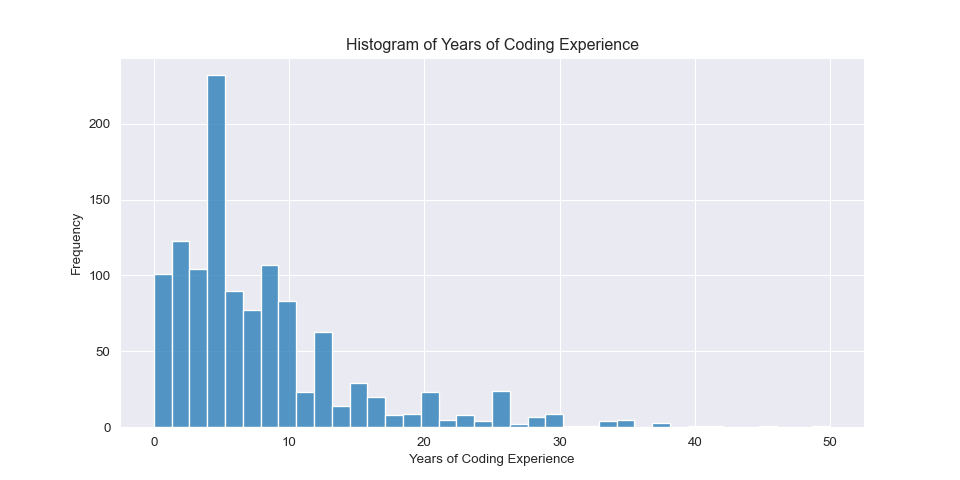

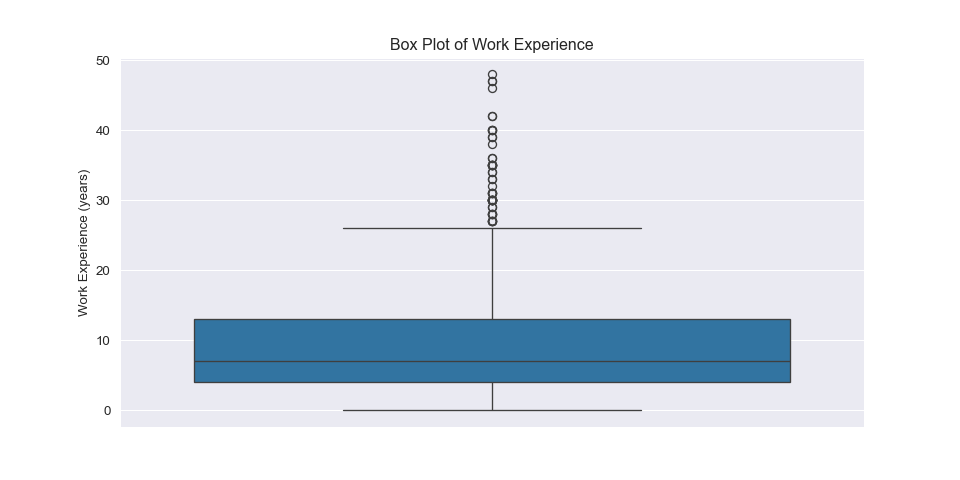

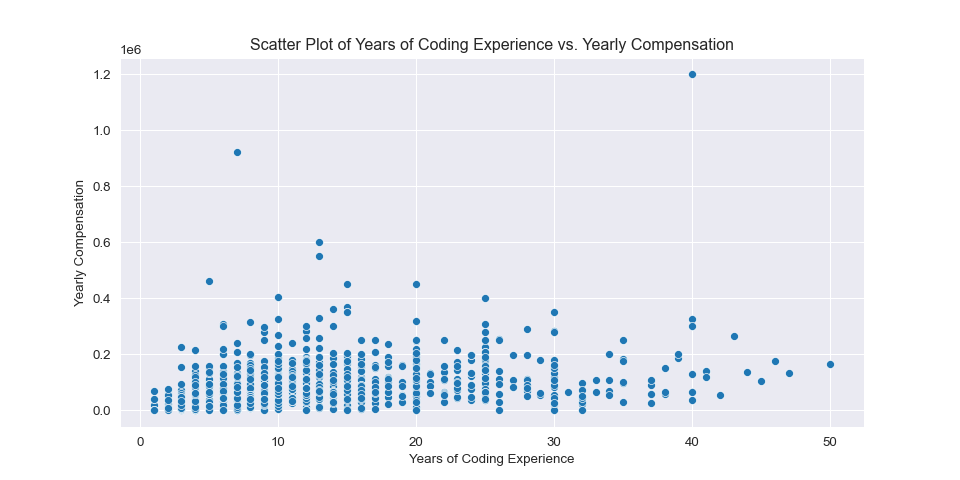

In [ ]:
# Histogram for years_code_pro
sns.histplot(data_dev_survey['years_code_pro']);
plt.title('Histogram of Years of Coding Experience');
plt.xlabel('Years of Coding Experience');
plt.ylabel('Frequency');
plt.show()

### Summary Statistics

In [ ]:
# Calculate summary statistics
data_dev_survey.describe()

        response_id   years_code  years_code_pro     work_exp  \
count   1183.000000  1182.000000     1183.000000  1183.000000   
mean   43949.774303    12.534687        7.961116     9.650042   
min      164.000000     1.000000        0.000000     0.000000   
25%    22733.000000     7.000000        3.000000     4.000000   
50%    43305.000000    10.000000        6.000000     7.000000   
75%    65791.000000    16.000000       10.000000    13.000000   
max    89072.000000    50.000000       50.000000    48.000000   
std    25327.979423     8.384094        7.153751     8.189750   

       converted_comp_yearly         survey_completion_date  
count           1.183000e+03                           1183  
mean            9.068442e+04  2023-05-15 19:40:43.617920512  
min             3.000000e+00            2023-05-01 00:00:00  
25%             4.159300e+04            2023-05-08 00:00:00  
50%             7.271400e+04            2023-05-16 00:00:00  
75%             1.200000e+05            20

## Exercise 2.2: EDA

### Data Cleaning

In [ ]:
# Check for missing values
coffee_quality.isnull().sum()

country_of_origin      0
continent_of_origin    0
farm_name              2
lot_number             1
mill                   3
company                0
altitude               1
region                 2
producer               1
in_country_partner     0
harvest_year           0
grading_date           0
owner                  0
variety                6
processing_method      5
aroma                  0
flavor                 0
aftertaste             0
acidity                0
body                   0
balance                0
uniformity             0
clean_cup              0
sweetness              0
overall                0
total_cup_points       0
moisture_percentage    0
color                  0
expiration             0
certification_body     0
month                  0
dtype: int64

### Data Visualization

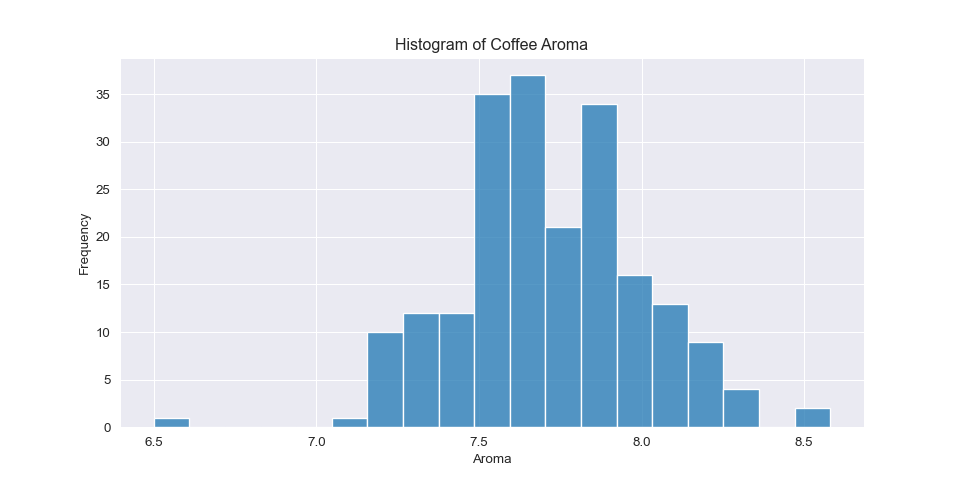

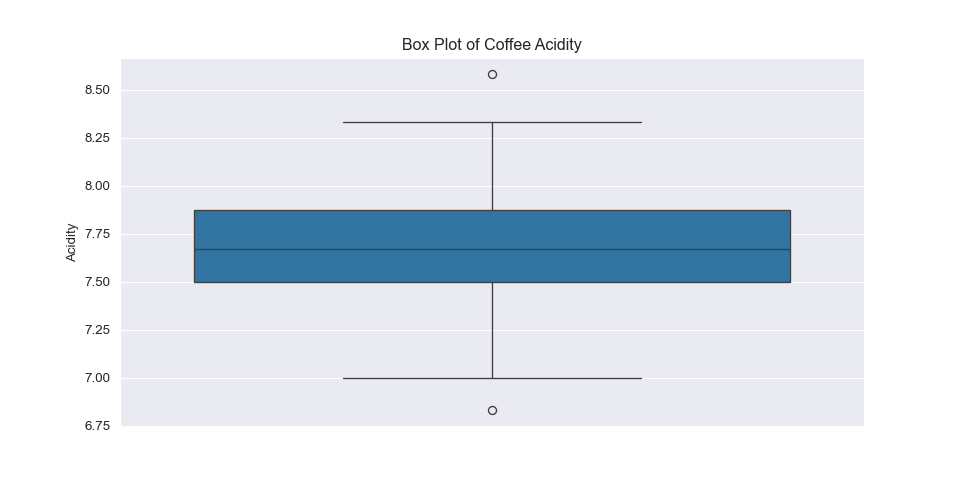

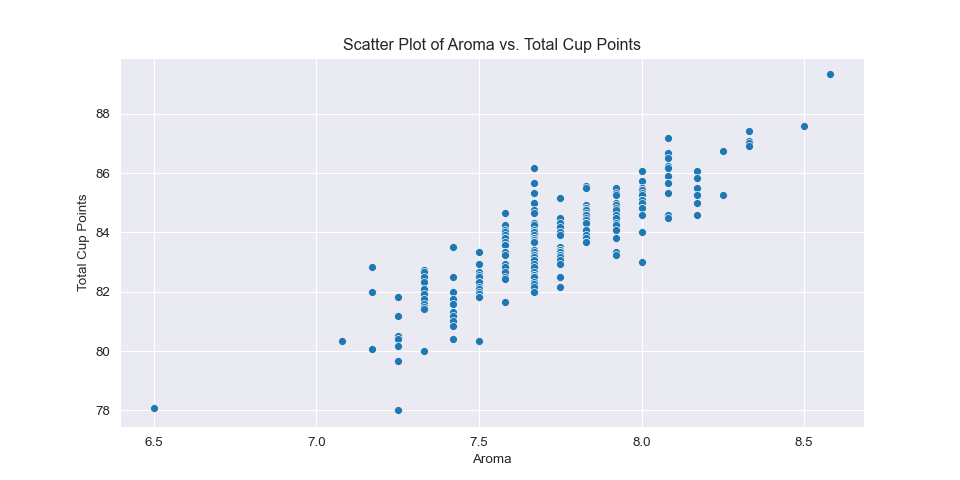

In [ ]:
# Histogram for aroma
sns.histplot(coffee_quality['aroma']);
plt.title('Histogram of Coffee Aroma');
plt.xlabel('Aroma');
plt.ylabel('Frequency');
plt.show()

### Summary Statistics

In [ ]:
# Calculate summary statistics
coffee_quality.describe()

                        grading_date       aroma      flavor  aftertaste  \
count                            207  207.000000  207.000000  207.000000   
mean   2022-11-17 11:42:36.521739008    7.721063    7.744734    7.599758   
min              2022-05-11 00:00:00    6.500000    6.750000    6.670000   
25%              2022-09-21 00:00:00    7.580000    7.580000    7.420000   
50%              2022-11-15 00:00:00    7.670000    7.750000    7.580000   
75%              2023-01-06 00:00:00    7.920000    7.920000    7.750000   
max              2023-04-28 00:00:00    8.580000    8.500000    8.420000   
std                              NaN    0.287626    0.279613    0.275911   

         acidity        body     balance  uniformity  clean_cup  sweetness  \
count  207.00000  207.000000  207.000000  207.000000      207.0      207.0   
mean     7.69029    7.640918    7.644058    9.990338       10.0       10.0   
min      6.83000    6.830000    6.670000    8.670000       10.0       10.0   
25%

------------------------------------------------------------------------

## Walkthrough 2.3: Data Preprocessing

### Inspect the Data after Loading

In [ ]:
# Display basic information about the dataset
data_dev_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   response_id                 1183 non-null   int64         
 1   work_as_dev                 1183 non-null   object        
 2   age                         1183 non-null   object        
 3   employment                  1183 non-null   object        
 4   remote_work                 1183 non-null   object        
 5   coding_activities           1182 non-null   object        
 6   ed_level                    1183 non-null   object        
 7   dev_type                    1183 non-null   object        
 8   years_code                  1182 non-null   float64       
 9   years_code_pro              1183 non-null   int64         
 10  org_size                    1183 non-null   object        
 11  country                     1183 non-null   object      

   response_id                     work_as_dev              age  \
0          164  I am a developer by profession  25-34 years old   
1          165  I am a developer by profession  18-24 years old   
2          190  I am a developer by profession  35-44 years old   
3          218  I am a developer by profession  35-44 years old   
4          220  I am a developer by profession  25-34 years old   

                                          employment  \
0  Employed, full-time;Independent contractor, fr...   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                            remote_work  \
0                                Remote   
1  Hybrid (some remote, some in-person)   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4  Hybrid (some remote, some in-person)   

 

### Handle Missing Values

In [ ]:
# Check for missing values
data_dev_survey.isnull().sum()

response_id                     0
work_as_dev                     0
age                             0
employment                      0
remote_work                     0
coding_activities               1
ed_level                        0
dev_type                        0
years_code                      1
years_code_pro                  0
org_size                        0
country                         0
language_have_worked_with       0
language_want_to_work_with     67
op_sys_professional_use        73
ai_view                         0
ai_trust                        0
ic_or_manager                   0
work_exp                        0
industry                      234
us_or_not                       0
plans_to_use_ai                 0
converted_comp_yearly           0
survey_completion_date          0
dtype: int64

   response_id                     work_as_dev              age  \
0          164  I am a developer by profession  25-34 years old   
1          165  I am a developer by profession  18-24 years old   
2          190  I am a developer by profession  35-44 years old   
3          218  I am a developer by profession  35-44 years old   
4          220  I am a developer by profession  25-34 years old   

                                          employment  \
0  Employed, full-time;Independent contractor, fr...   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                            remote_work  \
0                                Remote   
1  Hybrid (some remote, some in-person)   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4  Hybrid (some remote, some in-person)   

 

### Handling Outliers

In [ ]:
# Select only numeric columns
numeric_data = data_dev_survey_imputed.select_dtypes(include=[np.number])

# Identify outliers using IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = numeric_data[(numeric_data < (Q1 - 1.5 * IQR)) \
                      | (numeric_data > (Q3 + 1.5 * IQR))]
print(outliers)

      response_id  years_code  years_code_pro  work_exp  converted_comp_yearly
0             NaN         NaN             NaN       NaN                    NaN
1             NaN         NaN             NaN       NaN                    NaN
2             NaN         NaN             NaN       NaN                    NaN
3             NaN         NaN             NaN       NaN                    NaN
4             NaN         NaN             NaN       NaN                    NaN
...           ...         ...             ...       ...                    ...
1178          NaN         NaN             NaN       NaN                    NaN
1179          NaN         NaN             NaN       NaN                    NaN
1180          NaN         NaN             NaN       NaN                    NaN
1181          NaN         NaN             NaN       NaN                    NaN
1182          NaN        39.0            38.0      39.0                    NaN

[1183 rows x 5 columns]

### Data Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization on converted_comp_yearly
scaler = MinMaxScaler()
data_dev_survey_imputed[['converted_comp_yearly']] = scaler.fit_transform(
  data_dev_survey_imputed[['converted_comp_yearly']]
)

# Standardization on work_exp
scaler = StandardScaler()
data_dev_survey_imputed[['work_exp']] = scaler.fit_transform(
  data_dev_survey_imputed[['work_exp']]
)

# Encoding categorical variables (country)
data_dev_survey_imputed = pd.get_dummies(data_dev_survey_imputed, 
                                         columns=['country'])

### Data Visualizations on Preprocessed Data

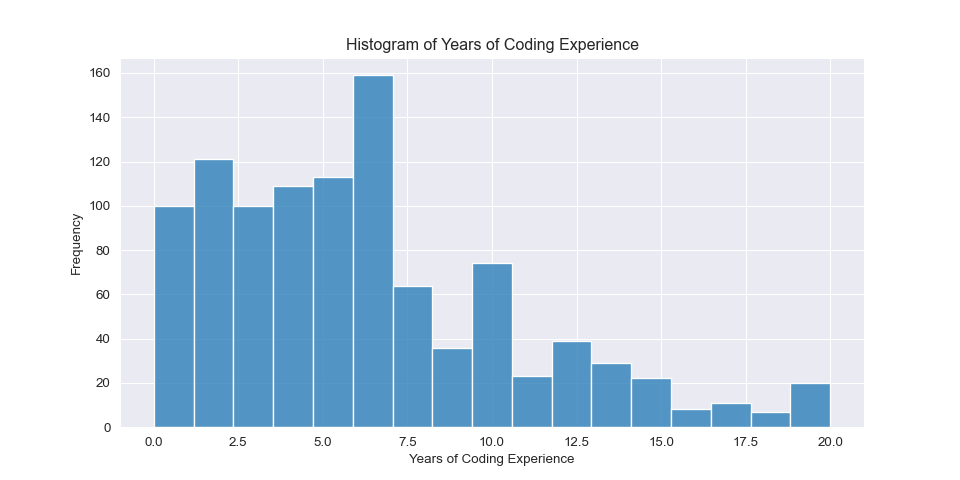

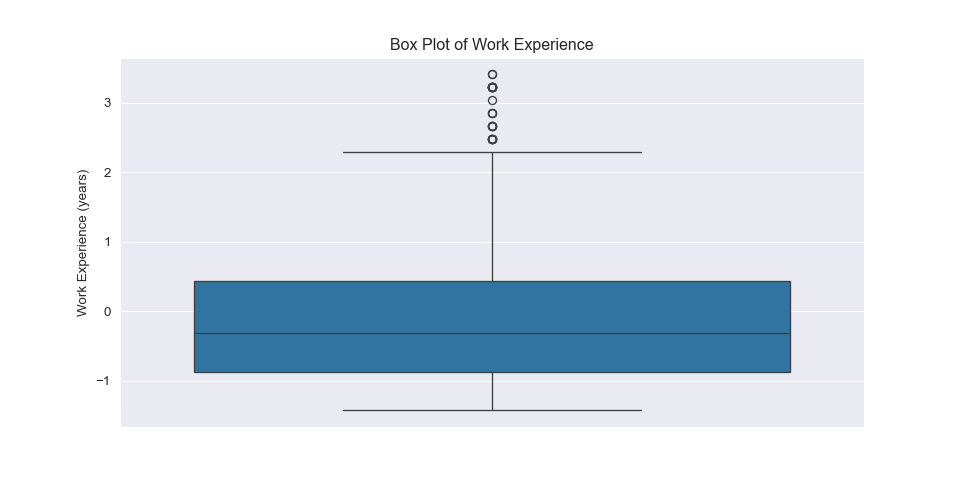

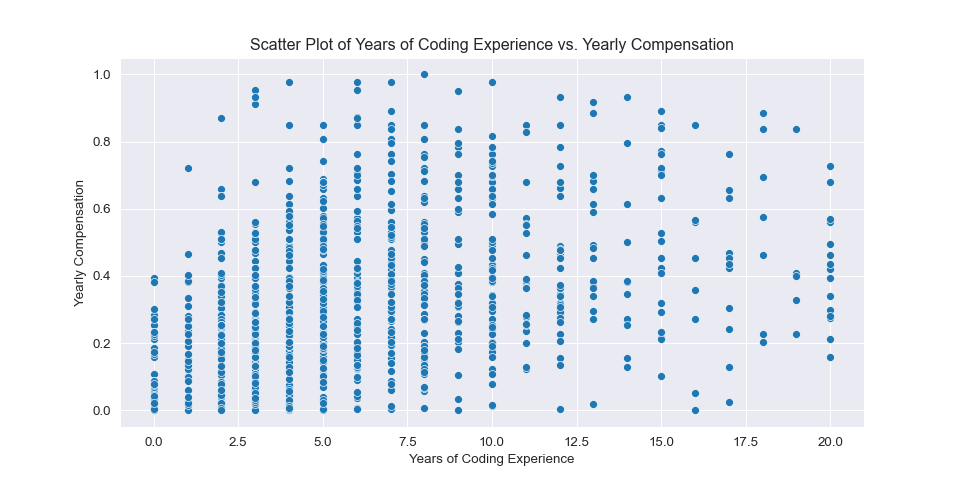

In [ ]:
# Histogram for years_code_pro
sns.histplot(data_dev_survey_imputed['years_code_pro']);
plt.title('Histogram of Years of Coding Experience');
plt.xlabel('Years of Coding Experience');
plt.ylabel('Frequency');
plt.show()

## Exercise 2.3: Data Preprocessing

### Inspect the Data after Loading

In [ ]:
# Display basic information about the dataset
coffee_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   country_of_origin    207 non-null    object        
 1   continent_of_origin  207 non-null    object        
 2   farm_name            205 non-null    object        
 3   lot_number           206 non-null    object        
 4   mill                 204 non-null    object        
 5   company              207 non-null    object        
 6   altitude             206 non-null    object        
 7   region               205 non-null    object        
 8   producer             206 non-null    object        
 9   in_country_partner   207 non-null    object        
 10  harvest_year         207 non-null    object        
 11  grading_date         207 non-null    datetime64[ns]
 12  owner                207 non-null    object        
 13  variety              201 non-null  

  country_of_origin continent_of_origin                 farm_name  \
0          Colombia       South America          Finca El Paraiso   
1            Taiwan                Asia  Royal Bean Geisha Estate   
2              Laos                Asia        OKLAO coffee farms   
3        Costa Rica       North America                 La Cumbre   
4          Colombia       South America           Finca Santuario   

                                lot_number                           mill  \
0                               CQU2022015               Finca El Paraiso   
1  The 2022 Pacific Rim Coffee Summit,T037       Royal Bean Geisha Estate   
2  The 2022 Pacific Rim Coffee Summit,LA01  oklao coffee processing plant   
3                               CQU2022017        La Montana Tarrazu MIll   
4                               CQU2023002                Finca Santuario   

                    company   altitude                region  \
0      Coffee Quality Union  1700-1930        Piendamo,Cau

### Handle Missing Values

In [ ]:
# Check for missing values
coffee_quality.isnull().sum()

country_of_origin      0
continent_of_origin    0
farm_name              2
lot_number             1
mill                   3
company                0
altitude               1
region                 2
producer               1
in_country_partner     0
harvest_year           0
grading_date           0
owner                  0
variety                6
processing_method      5
aroma                  0
flavor                 0
aftertaste             0
acidity                0
body                   0
balance                0
uniformity             0
clean_cup              0
sweetness              0
overall                0
total_cup_points       0
moisture_percentage    0
color                  0
expiration             0
certification_body     0
month                  0
dtype: int64

  country_of_origin continent_of_origin                 farm_name  \
0          Colombia       South America          Finca El Paraiso   
1            Taiwan                Asia  Royal Bean Geisha Estate   
2              Laos                Asia        OKLAO coffee farms   
3        Costa Rica       North America                 La Cumbre   
4          Colombia       South America           Finca Santuario   

                                lot_number                           mill  \
0                               CQU2022015               Finca El Paraiso   
1  The 2022 Pacific Rim Coffee Summit,T037       Royal Bean Geisha Estate   
2  The 2022 Pacific Rim Coffee Summit,LA01  oklao coffee processing plant   
3                               CQU2022017        La Montana Tarrazu MIll   
4                               CQU2023002                Finca Santuario   

                    company   altitude                region  \
0      Coffee Quality Union  1700-1930        Piendamo,Cau

### Handle Outliers

In [ ]:
# Select only numeric columns
numeric_data = coffee_quality_imputed.select_dtypes(include=[np.number])

# Identify outliers using IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = numeric_data[(numeric_data < (Q1 - 1.5 * IQR)) \
                      | (numeric_data > (Q3 + 1.5 * IQR))]
print(outliers)

     aroma  flavor  aftertaste  acidity  body  balance  uniformity  clean_cup  \
0     8.58    8.50        8.42     8.58  8.25     8.42         NaN        NaN   
1     8.50    8.50         NaN      NaN   NaN     8.25         NaN        NaN   
2      NaN     NaN         NaN      NaN   NaN      NaN         NaN        NaN   
3      NaN     NaN         NaN      NaN  8.17      NaN         NaN        NaN   
4      NaN     NaN         NaN      NaN   NaN      NaN         NaN        NaN   
..     ...     ...         ...      ...   ...      ...         ...        ...   
202    NaN     NaN        6.92      NaN   NaN      NaN         NaN        NaN   
203    NaN     NaN        6.75      NaN   NaN      NaN         NaN        NaN   
204    NaN     NaN         NaN      NaN  7.08      NaN         NaN        NaN   
205   6.50    6.75        6.75      NaN  7.08     7.00         NaN        NaN   
206    NaN     NaN        6.67     6.83  6.83     6.67         NaN        NaN   

     sweetness  overall  to

### Data Transformation

In [ ]:
# Normalization on total_cup_points
scaler = MinMaxScaler()
coffee_quality_imputed[['total_cup_points']] = \
  scaler.fit_transform(coffee_quality_imputed[['total_cup_points']])
# Can use this instead
coffee_quality_imputed.loc[:, ['total_cup_points']] = \
  scaler.fit_transform(coffee_quality_imputed[['total_cup_points']])

# Standardization on acidity
scaler = StandardScaler()
coffee_quality_imputed[['acidity']] = scaler.fit_transform(
  coffee_quality_imputed[['acidity']]
)
# Or this
coffee_quality_imputed.loc[:, ['acidity']] = \
  scaler.fit_transform(coffee_quality_imputed[['acidity']])

# Encoding categorical variables (country and continent of origin)
coffee_quality_imputed = pd.get_dummies(
  coffee_quality_imputed, 
  columns=['country_of_origin', 'continent_of_origin'])

### Data Visualizations on Preprocessed Data

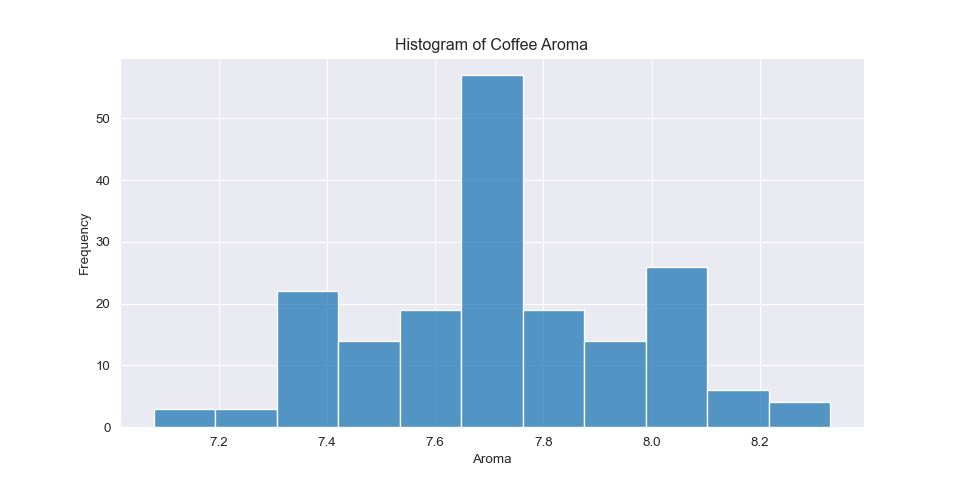

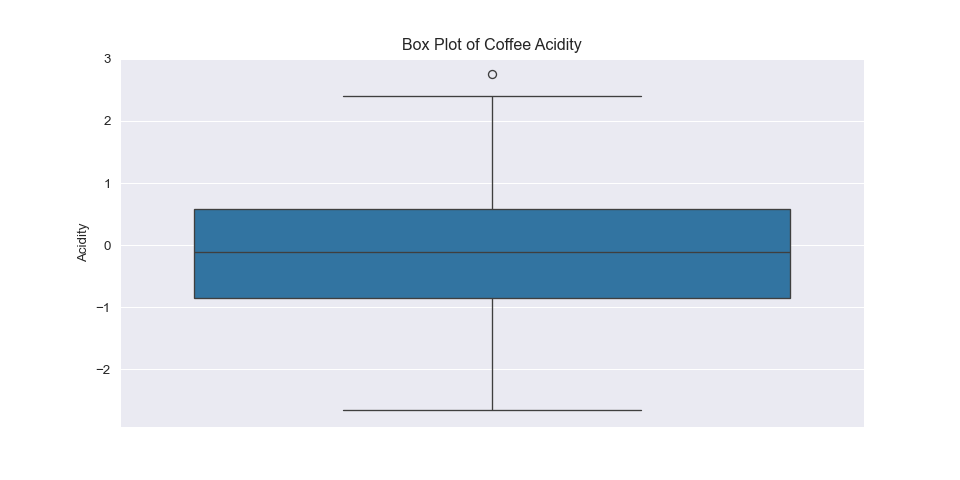

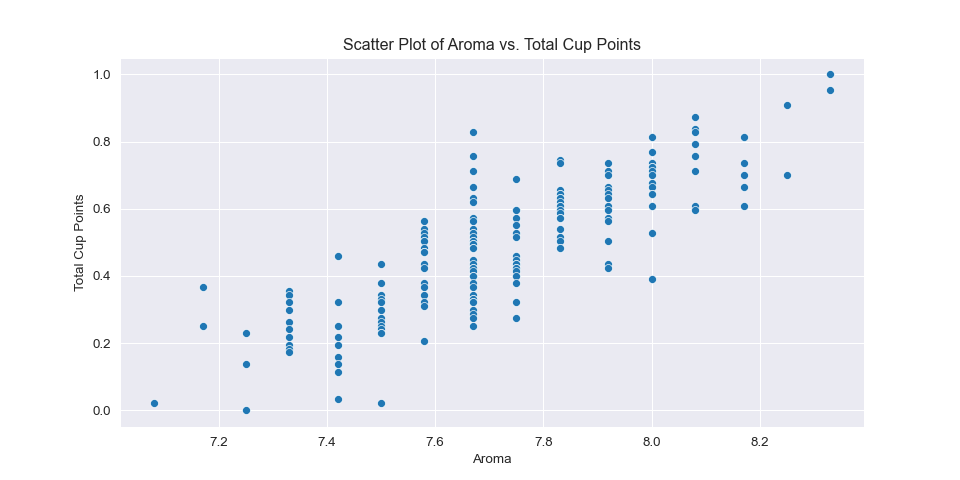

In [ ]:
# Histogram for aroma
sns.histplot(coffee_quality_imputed['aroma']);
plt.title('Histogram of Coffee Aroma');
plt.xlabel('Aroma');
plt.ylabel('Frequency');
plt.show()

------------------------------------------------------------------------

## Walkthrough 2.4: Correlations

### Correlation Matrix

In [ ]:
# Select only numeric columns
numeric_columns = data_dev_survey.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
correlation_matrix

                       response_id  years_code  years_code_pro  work_exp  \
response_id               1.000000   -0.094216       -0.093518 -0.079801   
years_code               -0.094216    1.000000        0.891028  0.794906   
years_code_pro           -0.093518    0.891028        1.000000  0.863575   
work_exp                 -0.079801    0.794906        0.863575  1.000000   
converted_comp_yearly    -0.011179    0.286163        0.290033  0.276963   

                       converted_comp_yearly  
response_id                        -0.011179  
years_code                          0.286163  
years_code_pro                      0.290033  
work_exp                            0.276963  
converted_comp_yearly               1.000000  

### Visualize Correlations

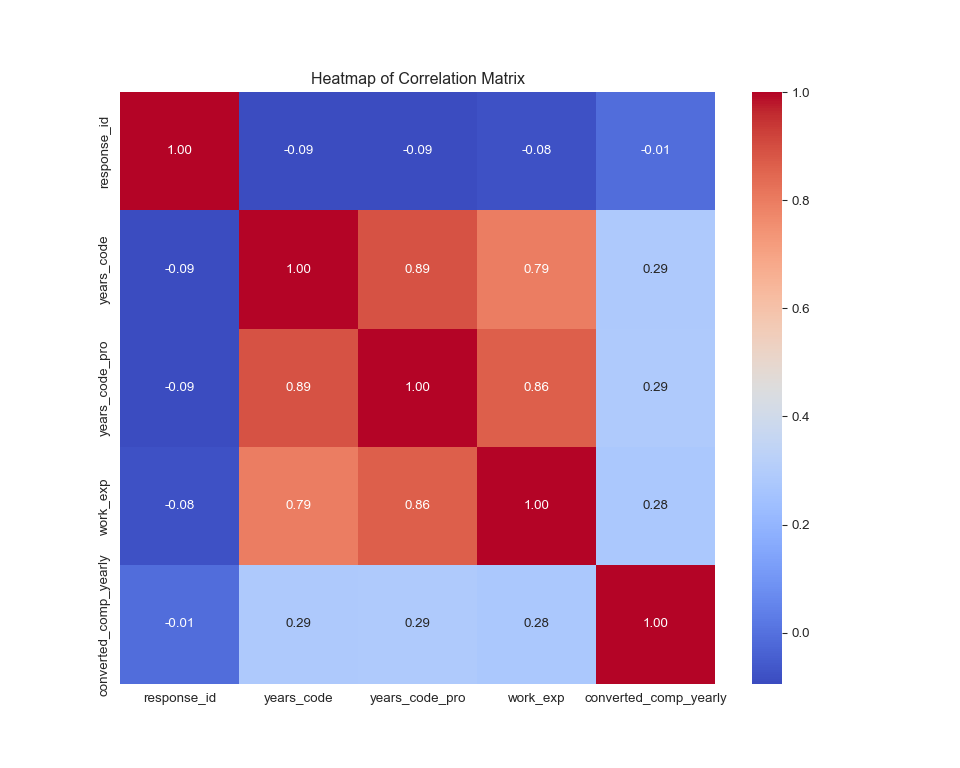

In [ ]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8));
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f');
plt.title('Heatmap of Correlation Matrix');
plt.show()

### Create Scatter Plots for Meaningful Correlations

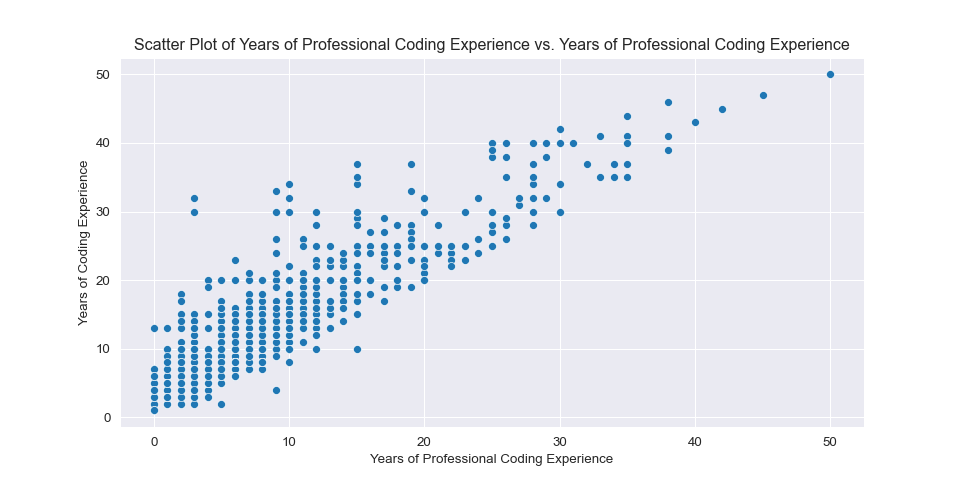

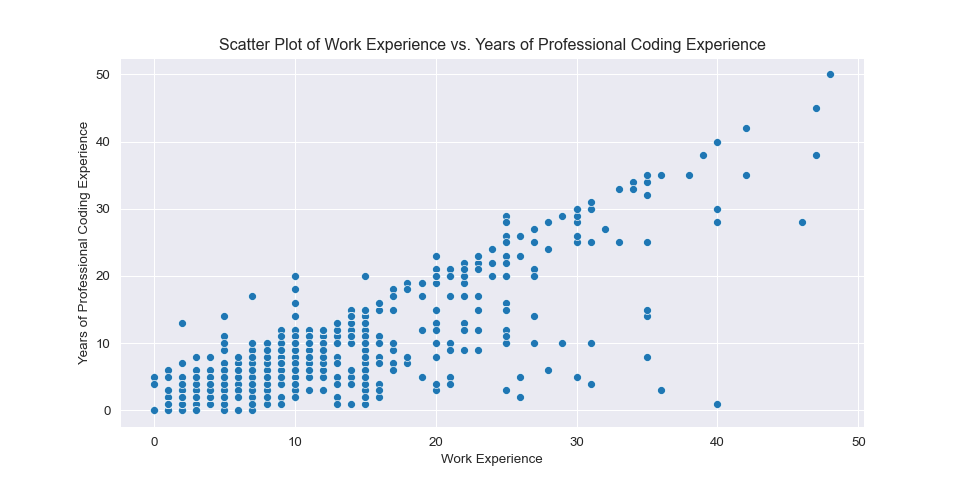

In [ ]:
# Scatter plot for years_code_pro vs. years_code
sns.scatterplot(x=data_dev_survey['years_code_pro'], 
                y=data_dev_survey['years_code']);
plt.title('Scatter Plot of Years of Professional Coding Experience vs. Years of Professional Coding Experience');
plt.xlabel('Years of Professional Coding Experience');
plt.ylabel('Years of Coding Experience');
plt.show()

## Exercise 2.4: Correlations

### Correlation Matrix

In [ ]:
# Select only numeric columns
numeric_columns = coffee_quality.select_dtypes(include=[np.number])

# Remove clean_cup and sweetness too
numeric_columns = numeric_columns.drop(columns=['clean_cup', 'sweetness'], 
                                       errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
correlation_matrix

                        aroma    flavor  aftertaste   acidity      body  \
aroma                1.000000  0.822779    0.793397  0.712920  0.633101   
flavor               0.822779  1.000000    0.876811  0.810934  0.739857   
aftertaste           0.793397  0.876811    1.000000  0.814439  0.738674   
acidity              0.712920  0.810934    0.814439  1.000000  0.765185   
body                 0.633101  0.739857    0.738674  0.765185  1.000000   
balance              0.745648  0.851786    0.861951  0.805236  0.816098   
uniformity          -0.028063 -0.039767   -0.023926 -0.062564 -0.043904   
overall              0.801765  0.877849    0.865612  0.840583  0.771607   
total_cup_points     0.868919  0.939124    0.934813  0.897057  0.847216   
moisture_percentage -0.002418 -0.050902   -0.051115 -0.016751  0.009771   

                      balance  uniformity   overall  total_cup_points  \
aroma                0.745648   -0.028063  0.801765          0.868919   
flavor               0.85178

### Visualize Correlations

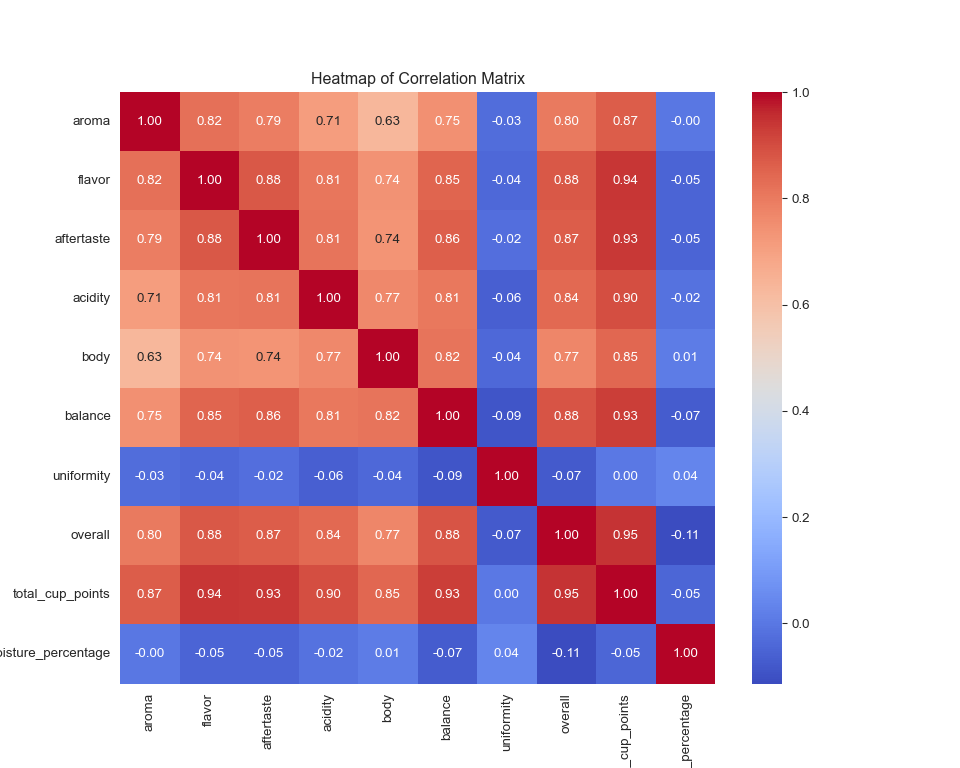

In [ ]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8));
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f');
plt.title('Heatmap of Correlation Matrix');
plt.show()

### Create Scatter Plots for Meaningful Correlations

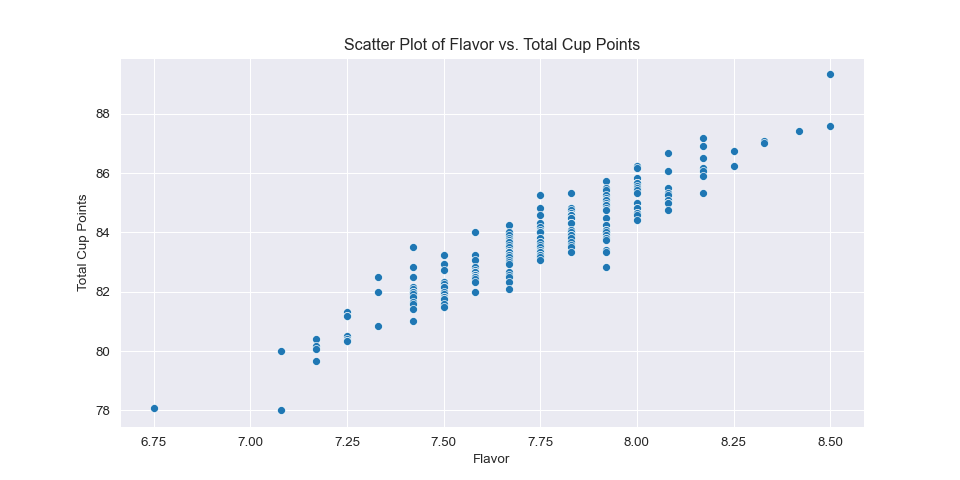

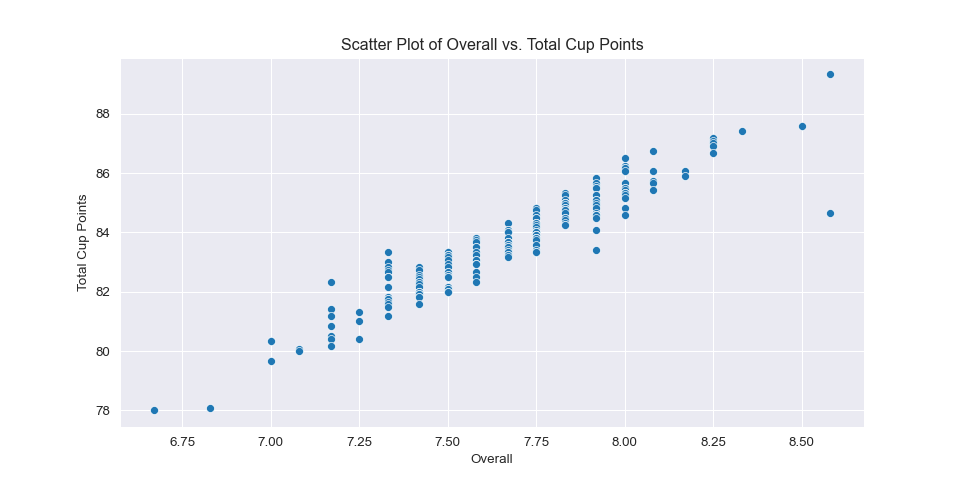

In [ ]:
# Scatter plot for flavor vs. total_cup_points
sns.scatterplot(x=coffee_quality['flavor'], 
                y=coffee_quality['total_cup_points']);
plt.title('Scatter Plot of Flavor vs. Total Cup Points');
plt.xlabel('Flavor');
plt.ylabel('Total Cup Points');
plt.show()

------------------------------------------------------------------------

# Week 3

## Walkthrough 3.1: Simulating Distributions

### Simulating Binomial

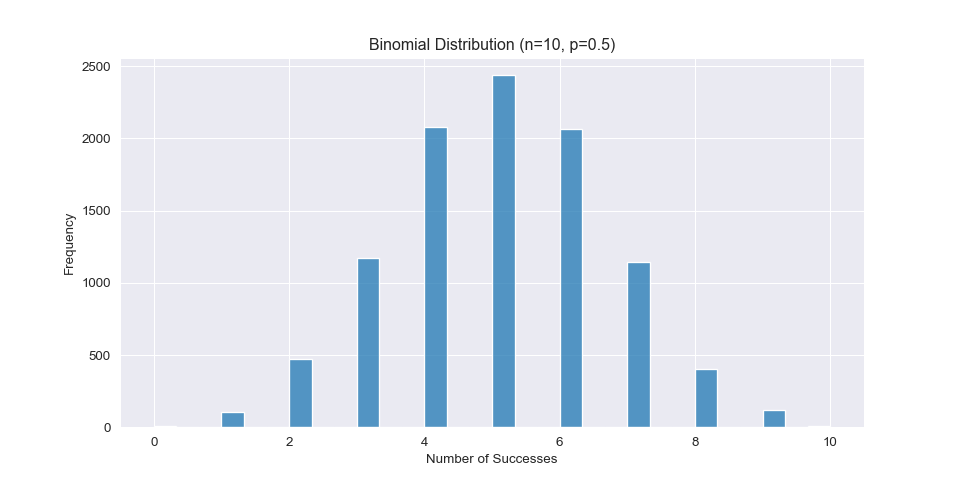

In [ ]:
# Simulate binomial distribution
binom_samples = np.random.binomial(n=10, p=0.5, size=10000)

# Plot histogram
sns.histplot(binom_samples, kde=False, bins=30);
plt.title('Binomial Distribution (n=10, p=0.5)');
plt.xlabel('Number of Successes');
plt.ylabel('Frequency');
plt.show()

### Simulating Normal

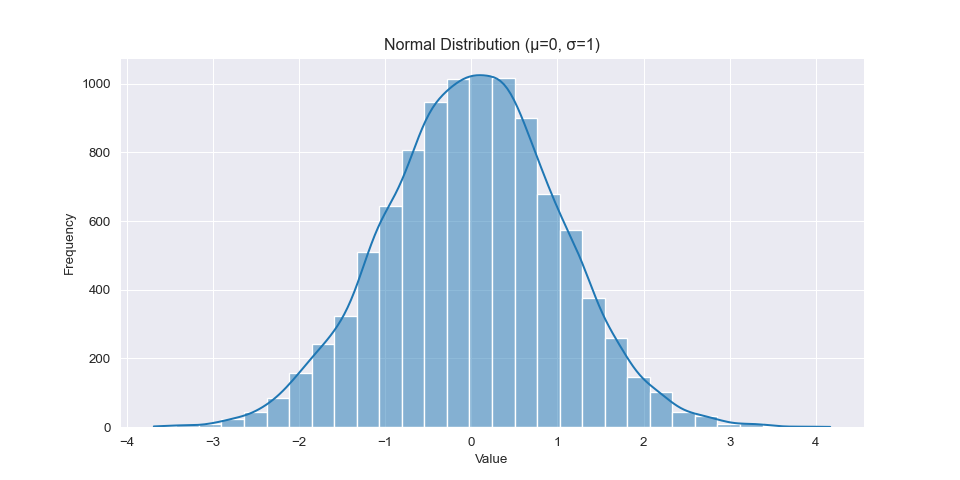

In [ ]:
# Simulate normal distribution
normal_samples = np.random.normal(loc=0, scale=1, size=10000)

# Plot histogram
sns.histplot(normal_samples, kde=True, bins=30);
plt.title('Normal Distribution (μ=0, σ=1)');
plt.xlabel('Value');
plt.ylabel('Frequency');
plt.show()

## Exercise 3.1:

### Simulating Poisson

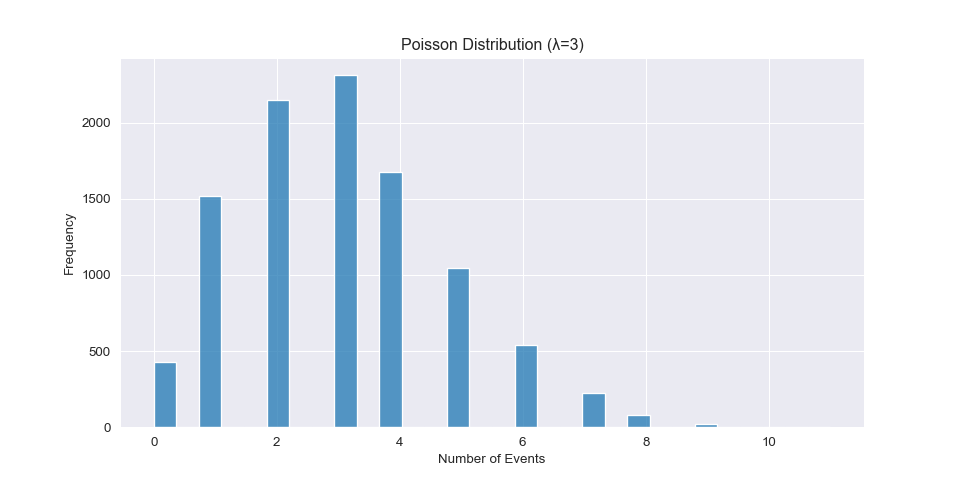

In [ ]:
# Simulate Poisson distribution with lambda (lam) parameter 3
poisson_samples = np.random.poisson(lam=3, size=10000)

# Plot histogram
sns.histplot(poisson_samples, kde=False, bins=30);
plt.title('Poisson Distribution (λ=3)');
plt.xlabel('Number of Events');
plt.ylabel('Frequency');
plt.show()

### Simulating Exponential

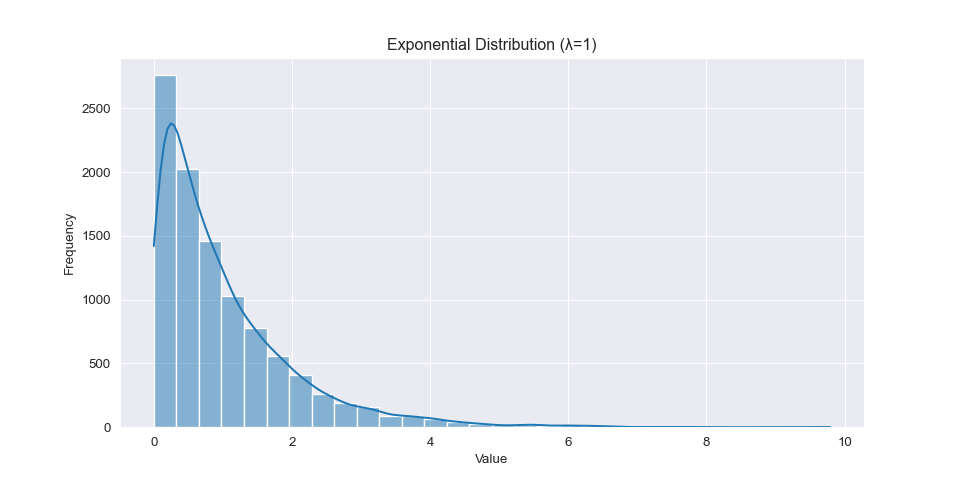

In [ ]:
# Simulate exponential distribution with scale parameter 1
exponential_samples = np.random.exponential(scale=1, size=10000)

# Plot histogram
sns.histplot(exponential_samples, kde=True, bins=30);
plt.title('Exponential Distribution (λ=1)');
plt.xlabel('Value');
plt.ylabel('Frequency');
plt.show()

------------------------------------------------------------------------

## Walkthrough 3.2: t-tests

In [ ]:
# One-sample t-test checking for evidence that mu compensation > 85000
salary_mean = 85000
t_stat, p_value = stats.ttest_1samp(
  data_dev_survey['converted_comp_yearly'].dropna(), 
  popmean = salary_mean,
  alternative='greater')

print(f"T-statistic: {t_stat}")

T-statistic: 2.387350503647815

P-value: 0.008563358466709872

In [ ]:
# Two-sample t-test comparing compensation across plans_to_use_ai groups
# Checking for a difference
using = data_dev_survey[data_dev_survey['plans_to_use_ai'] == 'Using']\
          ['converted_comp_yearly']\
          .dropna()
plan_to_use = data_dev_survey[data_dev_survey['plans_to_use_ai'] == 'Plan to use']\
          ['converted_comp_yearly']\
          .dropna()
t_stat, p_value = stats.ttest_ind(using, plan_to_use, equal_var=False)

print(f"T-statistic: {t_stat}")

T-statistic: 0.9293366153676751

P-value: 0.3529304815725288

## Exercise 3.2: t-tests

In [ ]:
# One-sample t-test checking for evidence that mu flavor < 7.8
flavor_mean = 7.8
t_stat, p_value = stats.ttest_1samp(
  coffee_quality['flavor'].dropna(), 
  flavor_mean,
  alternative='less')

print(f"T-statistic: {t_stat}")

T-statistic: -2.8437004395767462

P-value: 0.0024543417348696964

In [ ]:
# Two-sample t-test checking for difference in Columbia and Brazil total_cup_points
colombia = coffee_quality[coffee_quality['country_of_origin'] == 'Colombia']\
                ['total_cup_points']\
                .dropna()
brazil = coffee_quality[coffee_quality['country_of_origin'] == 'Brazil']\
                ['total_cup_points'].\
                dropna()
t_stat, p_value = stats.ttest_ind(colombia, brazil, equal_var=False)

print(f"T-statistic: {t_stat}")

T-statistic: 2.3332681111615488

P-value: 0.032140770512696565

------------------------------------------------------------------------

## Walkthrough 3.3: Comparative Tests

The `*groups` syntax unpacks the lists from the `groups` variable so
that each list is passed as a separate argument to `stats.f_oneway`.
This function then performs a one-way ANOVA test across the different
groups.

In [ ]:
# Perform one-way ANOVA comparing compensation across different levels of
# remote_work
groups = data_dev_survey.groupby('remote_work')['converted_comp_yearly']\
            .apply(list)
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat}")

F-statistic: 14.664978544620904

P-value: 5.116178713207836e-07

In [ ]:
# Create a contingency table of employment and remote_work
contingency_table = pd.crosstab(data_dev_survey['employment'], 
                                data_dev_survey['remote_work'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")

Chi-Square Statistic: 27.018703290562446

P-value: 0.019146108619201168

## Exercise 3.3: Comparative Tests

In [ ]:
# Perform one-way ANOVA comparing total_cup_points across country_of_origin
groups = coffee_quality.groupby('country_of_origin')['total_cup_points']\
            .apply(list)
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat}")

F-statistic: 3.429178050416842

P-value: 3.3064087043319192e-06

In [ ]:
# Perform a chi-square test of independence for processing_method versus
# continent_of_origin

# Create a contingency table
contingency_table = pd.crosstab(coffee_quality['processing_method'],
                                coffee_quality['continent_of_origin'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")

Chi-Square Statistic: 56.39467201623233

P-value: 0.000767141959167542

------------------------------------------------------------------------

## Walkthrough 3.4: Non-Parametric Tests

In [ ]:
# Perform Mann-Whitney U Test comparing compensation for Remote and In-person
group1 = data_dev_survey[data_dev_survey['remote_work'] == 'Remote']\
            ['converted_comp_yearly']\
            .dropna()
group2 = data_dev_survey[data_dev_survey['remote_work'] == 'In-person']\
            ['converted_comp_yearly']\
            .dropna()
stat, p_value = stats.mannwhitneyu(group1, group2)

print(f"Mann-Whitney U Statistic: {stat}")

Mann-Whitney U Statistic: 44426.5

P-value: 4.34784546766904e-11

In [ ]:
# Perform Kruskal-Wallis H Test comparing compensation across countries
groups = data_dev_survey.groupby('country')['converted_comp_yearly'].apply(list)
stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis H Statistic: {stat}")

Kruskal-Wallis H Statistic: 785.9809515500227

P-value: 3.281353234345449e-110

## Exercise 3.4: Non-Parametric Tests

In [ ]:
# Perform Mann-Whitney U Test comparing total_cup_points for Guatemala
# and Honduras
group1 = coffee_quality\
    [coffee_quality['country_of_origin'] == 'Guatemala']\
    ['total_cup_points']\
    .dropna()
group2 = coffee_quality\
    [coffee_quality['country_of_origin'] == 'Honduras']\
    ['total_cup_points']\
    .dropna()
stat, p_value = stats.mannwhitneyu(group1, group2)

print(f"Mann-Whitney U Statistic: {stat}")

Mann-Whitney U Statistic: 217.5

P-value: 0.004309866203612997

In [ ]:
# Perform Kruskal-Wallis H Test comparing total_cup_points across 
# continent_of_origin
groups = coffee_quality.groupby('continent_of_origin')['total_cup_points'].apply(list)
stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis H Statistic: {stat}")

Kruskal-Wallis H Statistic: 18.1515777694049

P-value: 0.00040929490942587276